# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


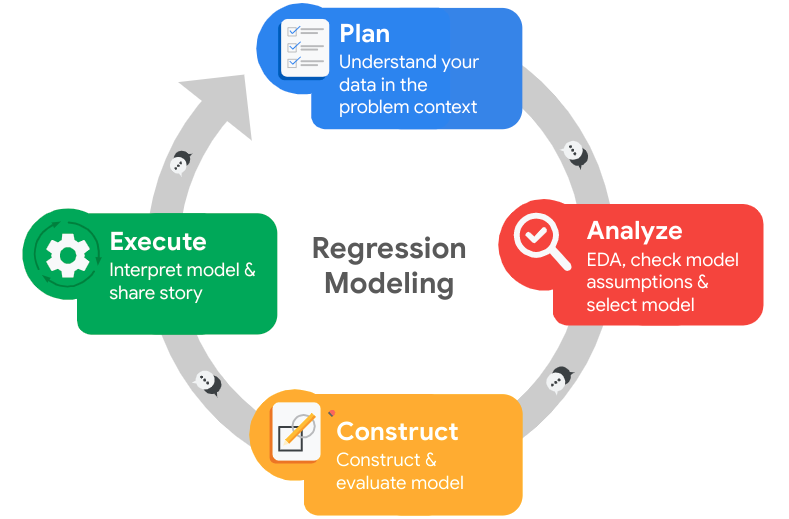

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df0.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [5]:
df0.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
df0.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
### YOUR CODE HERE ###


In [ ]:
# Rename columns as needed
### YOUR CODE HERE ###


# Display all column names after the update
### YOUR CODE HERE ###


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0[df0.duplicated()]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###


In [11]:
df1.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

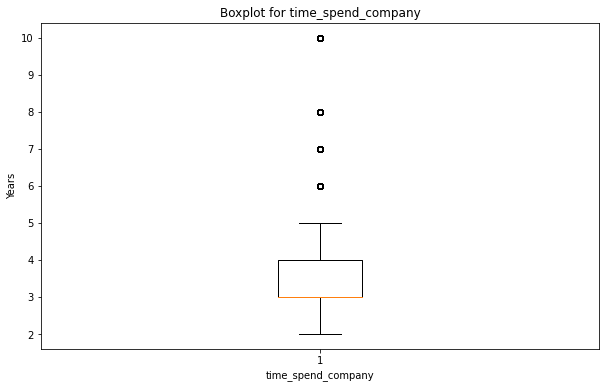

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))  # Optional: to set the figure size
plt.boxplot(df1['time_spend_company'])
plt.title('Boxplot for time_spend_company')
plt.xlabel('time_spend_company')
plt.ylabel('Years')
plt.show()

In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['time_spend_company'].quantile(0.25)
Q3 = df1['time_spend_company'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[(df1['time_spend_company'] < lower_bound) | (df1['time_spend_company'] > upper_bound)]

# Count the number of outlier rows
num_outliers = len(outliers)



In [16]:
num_outliers

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
x = df1.left.value_counts()
print(x)
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
percentages = df1['left'].value_counts(normalize=True) * 100
print(percentages)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [18]:
df1.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
dept_wise = df1[['Department', 'left']]
dept_wise_summary = df1.groupby('Department').agg(
    count_left=('left', 'count'),
    sum_left=('left', 'sum'),
)
dept_wise_summary['percentage_left'] = (dept_wise_summary['sum_left'] / dept_wise_summary['count_left']) * 100

# Display the resulting DataFrame
print(dept_wise_summary)

             count_left  sum_left  percentage_left
Department                                        
IT                  976       158        16.188525
RandD               694        85        12.247839
accounting          621       109        17.552335
hr                  601       113        18.801997
management          436        52        11.926606
marketing           673       112        16.641902
product_mng         686       110        16.034985
sales              3239       550        16.980550
support            1821       312        17.133443
technical          2244       390        17.379679


In [25]:
### checking if leaving the company is less-likely for MANAGEMENT / R&D employees than others

### building the contingency table for applying the chi-squared test
import pandas as pd
from scipy.stats import chi2_contingency

df = df1
# Create a new column to categorize departments
df['category'] = df['Department'].apply(lambda x: 'Management_RnD' if x in ['Management', 'RandD'] else 'Other')

# Create a contingency table
contingency_table = pd.crosstab(df['category'], df['left'])

# Display the contingency table
print(contingency_table)


left               0     1
category                  
Management_RnD   609    85
Other           9391  1906


In [26]:
### Chi squared test

import numpy as np
from scipy.stats import chi2_contingency

# Define your contingency table
contingency_table = np.array([[609, 85], [9391, 1906]])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 9.764226978629285
P-Value: 0.0017794031773165151
Degrees of Freedom: 1
Expected Frequencies:
[[ 578.76740889  115.23259111]
 [9421.23259111 1875.76740889]]


In [28]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'category'],
      dtype='object')

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a plot as needed
### YOUR CODE HERE ###
check_satisfaction = df1[['Department', 'left', 'satisfaction_level', 'last_evaluation', 
                          'number_project', 'average_montly_hours', 'promotion_last_5years']]
check_satisfaction_summary = check_satisfaction.groupby('Department').agg(
    count_left=('left', 'count'),
    sum_left=('left', 'sum'),
    satisfaction_avg=('satisfaction_level', 'mean'),
    last_eval_avg=('last_evaluation', 'mean'),
    number_project_avg=('number_project', 'mean'),
    montly_hours_avg=('average_montly_hours', 'mean'),
    avg_promo=('promotion_last_5years', 'mean')
)
check_satisfaction_summary['percentage_left'] = (check_satisfaction_summary['sum_left'] / check_satisfaction_summary['count_left']) * 100

# Display the resulting DataFrame
print(check_satisfaction_summary)

             count_left  sum_left  satisfaction_avg  last_eval_avg  \
Department                                                           
IT                  976       158          0.634016       0.715051   
RandD               694        85          0.627176       0.712983   
accounting          621       109          0.607939       0.721900   
hr                  601       113          0.621947       0.715691   
management          436        52          0.631995       0.726307   
marketing           673       112          0.634770       0.718440   
product_mng         686       110          0.629825       0.713790   
sales              3239       550          0.631349       0.710398   
support            1821       312          0.634822       0.722998   
technical          2244       390          0.627937       0.719791   

             number_project_avg  montly_hours_avg  avg_promo  percentage_left  
Department                                                                     

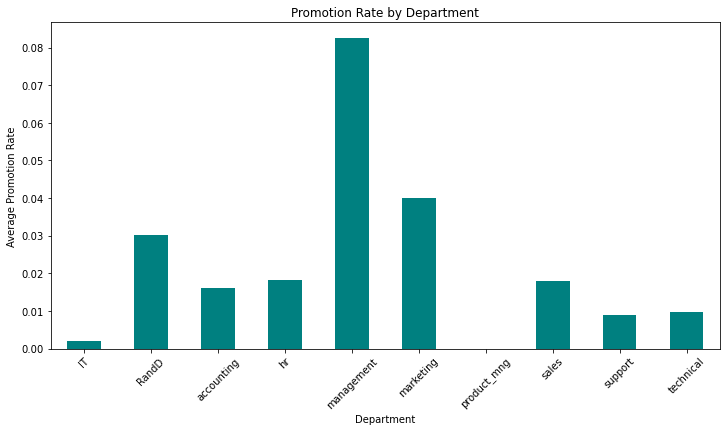

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

# Bar plot for average promotion rate by department
plt.figure(figsize=(12, 6))
check_satisfaction_summary['avg_promo'].plot(kind='bar', color='teal')
plt.title('Promotion Rate by Department')
plt.xlabel('Department')
plt.ylabel('Average Promotion Rate')
plt.xticks(rotation=45)
plt.show()

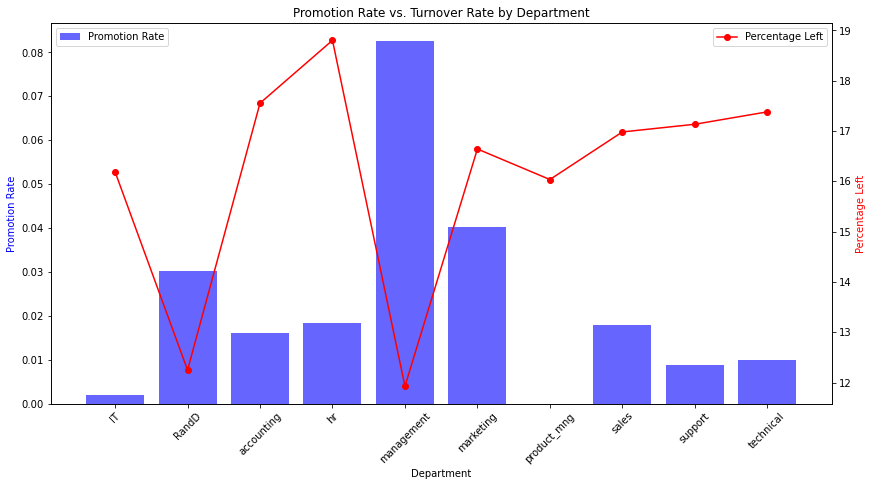

In [31]:
# Create a plot as needed
### YOUR CODE HERE ###
import numpy as np

# Plot promotion rate vs. turnover rate
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for promotion rate
ax1.bar(check_satisfaction_summary.index, check_satisfaction_summary['avg_promo'], color='blue', alpha=0.6, label='Promotion Rate')

# Twin axis to plot percentage left
ax2 = ax1.twinx()
ax2.plot(check_satisfaction_summary.index, check_satisfaction_summary['percentage_left'], color='red', marker='o', label='Percentage Left')

# Titles and labels
ax1.set_xlabel('Department')
ax1.set_ylabel('Promotion Rate', color='blue')
ax2.set_ylabel('Percentage Left', color='red')
plt.title('Promotion Rate vs. Turnover Rate by Department')
ax1.set_xticklabels(check_satisfaction_summary.index, rotation=45)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


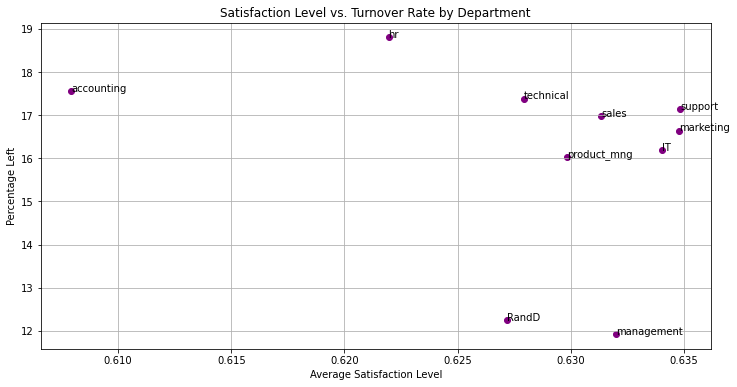

In [32]:
# Create a plot as needed
### YOUR CODE HERE ###
# Scatter plot for satisfaction level vs. turnover rate
plt.figure(figsize=(12, 6))
plt.scatter(check_satisfaction_summary['satisfaction_avg'], check_satisfaction_summary['percentage_left'], color='purple')
plt.title('Satisfaction Level vs. Turnover Rate by Department')
plt.xlabel('Average Satisfaction Level')
plt.ylabel('Percentage Left')
for i in check_satisfaction_summary.index:
    plt.text(check_satisfaction_summary['satisfaction_avg'][i], check_satisfaction_summary['percentage_left'][i], i)
plt.grid(True)
plt.show()


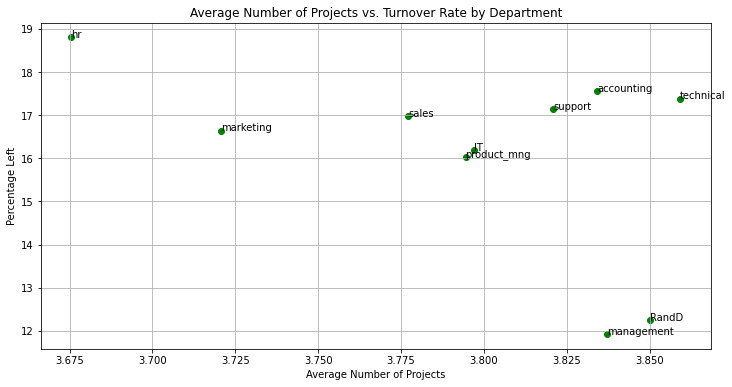

In [33]:
# Create a plot as needed
### YOUR CODE HERE ###
# Scatter plot for number of projects vs. turnover rate
plt.figure(figsize=(12, 6))
plt.scatter(check_satisfaction_summary['number_project_avg'], check_satisfaction_summary['percentage_left'], color='green')
plt.title('Average Number of Projects vs. Turnover Rate by Department')
plt.xlabel('Average Number of Projects')
plt.ylabel('Percentage Left')
for i in check_satisfaction_summary.index:
    plt.text(check_satisfaction_summary['number_project_avg'][i], check_satisfaction_summary['percentage_left'][i], i)
plt.grid(True)
plt.show()


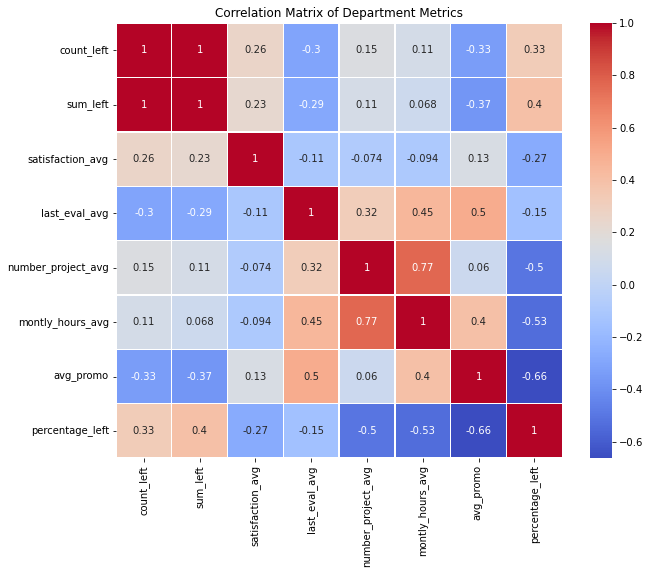

In [34]:
# Create a plot as needed
### YOUR CODE HERE ###
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = check_satisfaction_summary.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Department Metrics')
plt.show()


In [36]:
# Define the aggregation functions
agg_funcs = {}

# Assign mean for numerical columns
for col in df1.select_dtypes(include='number').columns:
    agg_funcs[col] = 'mean'

# Assign mode for categorical columns
for col in df1.select_dtypes(include='object').columns:
    agg_funcs[col] = lambda x: x.mode()[0]

# Perform the aggregation
aggregated_df = df1.groupby('left').agg(agg_funcs)

# Display the resulting DataFrame
aggregated_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,category
left,,,,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.0,0.019500,sales,low,Other
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,1.0,0.004018,sales,low,Other


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

1. The p-value for the above chi-squared test (less likely to leave company for Mgmt/R&D employees) < 0.05 => Alternate hypothesis is true: "It's actually less-likely for Mgmt/R&D employees to leave the company".
2. satisfaction_level is much low for those who left the organization.
3. Last evaluation and Average monthly hours are also more for those who left, while the promotion_rate is much lower.

Satisfaction: Lower satisfaction levels are strongly associated with higher turnover.

Workload: Higher numbers of projects and monthly hours correlate with employees leaving.

Tenure: Longer tenure is associated with a higher likelihood of leaving, possibly indicating stagnation.

Promotion: Lack of promotions appears to be a significant factor in turnover.

Work Accidents: Employees with work accidents tend to stay longer, possibly due to a supportive environment.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classification

### Identify the types of models most appropriate for this task.

Random Forest Classifier, XGBoost Classifier

### Modeling

Add as many cells as you need to conduct the modeling process.

In [37]:
### YOUR CODE HERE ###
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df1 is your DataFrame
# Step 1: Prepare the Data
X = df1.drop('left', axis=1)
y = df1['left']

# Step 2: Encode Categorical Variables
# Use LabelEncoder to convert categorical columns to numeric
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the XGBoost Model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9787
Confusion Matrix:
[[1986   12]
 [  39  362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



AUC: 0.9798


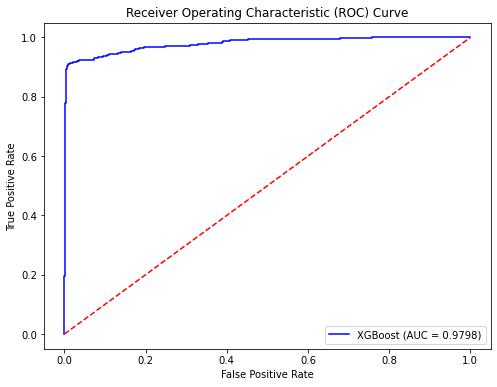

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 2: Predict Probabilities
y_pred_prob = xgboost_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class (1)

# Step 3: Calculate the AUC-ROC
auc = roc_auc_score(y_test, y_pred_prob)

# Display the AUC
print(f"AUC: {auc:.4f}")

# Optional: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (no skill classifier)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Accuracy: 0.9787
Confusion Matrix:
[[1986   12]
 [  39  362]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.